In [18]:
# exp.end()

In [19]:
# # !pip install hyperdash
# # from hyperdash import Experiment
# # !hyperdash signup --github
# exp = Experiment("14_1")

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd "/content/drive/MyDrive/kadai/2_notebook"

/content/drive/MyDrive/kadai/2_notebook


In [22]:
DataNum = 5

In [23]:
#@title
#必要なモジュールをインポート
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import Convolution, MaxPooling, ReLU, Affine, SoftmaxWithLoss, Dropout, BatchNormalization
from common.optimizer import RMSProp
from common.convnet import ConvNet, SimpleConvNet
from sklearn.model_selection import train_test_split

In [24]:
#@title
#拡張されたデータを取り込む
train_data_aug = np.load("../augmented_7/augmented_data_image.npy") #----- <-ここを変更
train_label_aug = np.load("../augmented_7/augmented_data_label.npy") #----- <- ここを変更

train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")

print("train_data_aug.shape=", train_data_aug.shape)
print("train_data.shape=", train_data.shape)

train_data_aug = (train_data_aug - train_data_aug.min()) / train_data_aug.max()
train_data_aug = train_data_aug.astype('float32')

train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')

train_data_aug = train_data_aug.reshape(-1, 28*28)
train_data = train_data.reshape(-1, 28*28)

train_data_aug, test_data_aug, train_label_aug, test_label_aug = train_test_split(train_data_aug, train_label_aug, 
                                                                                        test_size=0.4, 
                                                                                        shuffle=True, stratify=train_label_aug
                                                                                       )
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, 
                                                                                        test_size=0.9,
                                                                                        shuffle=True, stratify=train_label
                                                                                       )
print("訓練aug:",train_label_aug.shape, test_label_aug.shape)
print("訓練:",train_label.shape, test_label.shape)

#拡張データと与えられている訓練データを合体
tr_d = np.append(train_data, train_data_aug, axis=0)
te_d = np.append(test_data, test_data_aug, axis=0)
tr_l = np.append(train_label, train_label_aug, axis=0)
te_l = np.append(test_label, test_label_aug, axis=0)
train_data = tr_d
test_data = te_d
train_label = tr_l
test_label = te_l
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)
print("内訳", np.sum(train_label, axis=0))

train_data_aug.shape= (32037, 1, 28, 28)
train_data.shape= (3000, 1, 28, 28)
訓練aug: (19222, 15) (12815, 15)
訓練: (300, 15) (2700, 15)
(19522, 784) (15515, 784) (19522, 15) (15515, 15)
内訳 [1335. 1282. 1270. 1302. 1345. 1284. 1246. 1326. 1287. 1246. 1306. 1335.
 1324. 1323. 1311.]


input size 28
conv_output_size 28
pool_output_size 15
pool_output_pixel 28800
input size2 15
conv_output_size2 15
pool_output_size2 8
pool_output_pixel2 8192
訓練データ 内訳 [17. 16. 15. 16. 17. 18. 17. 17. 15. 18. 16. 18. 18. 18. 20.]
テストデータ 内訳 [18. 16. 27. 21. 14.  5. 13. 12. 17. 20. 16. 16. 23. 18. 20.]
------ epoch=1 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.75390625
test_accuracy: 0.765625
経過時間： 0.08 時間
合計時間： 15.11 時間
残り時間： 15.04 時間


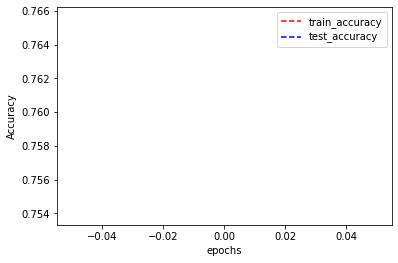

------ epoch=2 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.76171875
test_accuracy: 0.7734375
経過時間： 0.15 時間
合計時間： 15.11 時間
残り時間： 14.96 時間


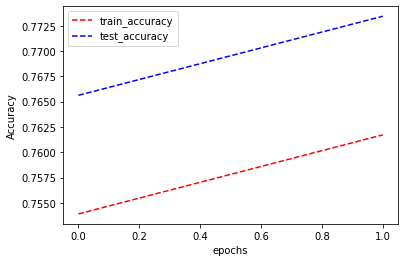

------ epoch=3 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.76953125
test_accuracy: 0.7734375
経過時間： 0.23 時間
合計時間： 15.09 時間
残り時間： 14.87 時間


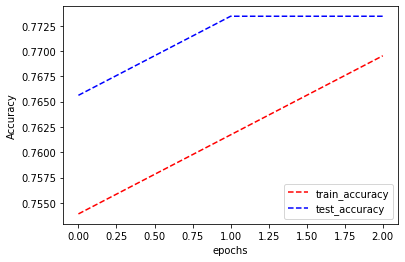

------ epoch=4 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.76953125
test_accuracy: 0.76953125
経過時間： 0.3 時間
合計時間： 15.1 時間
残り時間： 14.8 時間


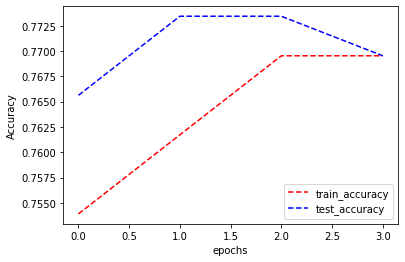

------ epoch=5 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.765625
test_accuracy: 0.77734375
経過時間： 0.38 時間
合計時間： 15.13 時間
残り時間： 14.75 時間


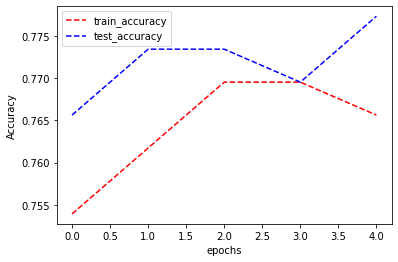

------ epoch=6 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.7734375
test_accuracy: 0.76953125
経過時間： 0.45 時間
合計時間： 15.14 時間
残り時間： 14.68 時間


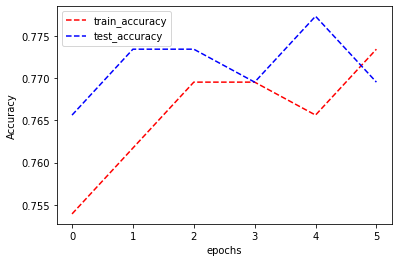

------ epoch=7 / 200 ------
it= 0 / 511
it= 500 / 511
train_accuracy: 0.78125
test_accuracy: 0.76171875
経過時間： 0.53 時間
合計時間： 15.14 時間
残り時間： 14.61 時間


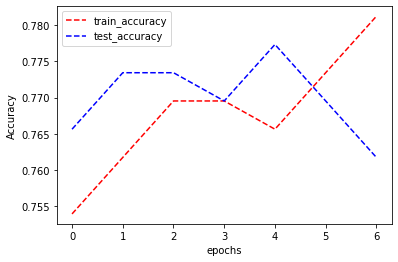

------ epoch=8 / 200 ------
it= 0 / 511


In [ ]:
# CNNのオブジェクト生成
snet = ConvNet(input_dim=(1, 28, 28), 
                 use_conv2=True, use_affine2=True,
                 conv_param={'filter_num':128, 'filter_size':3, 'pad':1, 'stride':1},
                 pool_param={'pool_size':2, 'pad':1, 'stride':2},
                 conv_param2={'filter_num2':128, 'filter_size2':3, 'pad2':1, 'stride2':1},
                 pool_param2={'pool_size2':2, 'pad2':1, 'stride2':2},
                 hidden_size=256, hidden_size2=256, output_size=15, weight_init_std=0.01,  
                 use_batchnorm_C1=False, use_batchnorm_C2=False, use_batchnorm_A1=True, use_batchnorm_A2=True,
                 use_dropout_A1=False, dropout_ratio_A1=0.5, use_dropout_A2=False, dropout_ratio_A2=0.5, 
                 use_succession=False, data_num=DataNum)

#時間計測用
import time
# get time when the program stated
start_time = time.time()


#モデルの訓練
train_data = train_data.reshape(-1, 1, 28, 28)
test_data = test_data.reshape(-1, 1, 28, 28)
x = train_data[:8192,:]
t = train_label[:8192,:]

x_tr = train_data[:256,:]
t_tr = train_label[:256,:]
x_te = test_data[:256,:]
t_te = test_label[:256,:]
print("訓練データ 内訳", np.sum(t_tr, axis=0))
print("テストデータ 内訳", np.sum(t_te, axis=0))

x = x.reshape(-1 , 1, 28, 28) # 配列形式の変形

epochs = 200
batch_size = 16

optimizer = RMSProp(lr=0.01, rho=0.9)

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)


train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):
    epoch_c = epoch + 1
    print("------","epoch=%s"%epoch_c, "/", epochs, "------")
    with open("params_"+str(DataNum)+".pickle", "wb") as f:
      pickle.dump(snet.params, f)

    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        if it%500 == 0:
          print("it=", it, "/", iter_num-1)
        mask = idx[batch_size*it : batch_size*(it+1)]

        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]

        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = snet.gradient(x_train, t_train)

        # 更新
        optimizer.update(snet.params, grads)

#     print("calculating train_loss")    
    train_loss.append(snet.loss(x_tr,  t_tr))

#     print("calculating test_loss")
    # テストデータにおけるloss
    test_loss.append(snet.loss(x_te, t_te))

#     print("calculating train_accuracy")
    # 訓練データにて精度を確認
    train_accuracy.append(snet.accuracy(x_tr, t_tr))
    
#     print("calculating test_accuracy")
    # テストデータにて精度を算出
    test_accuracy.append(snet.accuracy(x_te, t_te))

    print('train_accuracy:', train_accuracy[epoch])
    print('test_accuracy:', test_accuracy[epoch])
    #時間計測用
    # calculate elapsed time
    elapsed_time = int(time.time() - start_time)
    elapsed_hour = elapsed_time / 3600
    print("経過時間：", np.round(elapsed_hour,decimals=2), "時間")
    epoch_time = elapsed_time/epoch_c
    total_time  = epoch_time * epochs
    remaining_time = total_time - elapsed_time
    print("合計時間：", np.round(total_time/3600,decimals=2), "時間")
    print("残り時間：", np.round(remaining_time/3600,decimals=2), "時間")
    df_log = pd.DataFrame({
            #  "train_loss":train_loss,
            #  "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
    df_log.plot(style=['r--', 'b--', 'r-', 'b-'])
    # plt.ylim([0.9,1.0])
    plt.ylabel("Accuracy")
    plt.xlabel("epochs")
    plt.show()



# 施策
- Dropout -> 0.5にして汎化
- Convのsizeを5x5にするか
- Convをさらに減らして、Affineを増やす
- BatchNormを試す
- qiitaとか読む
- https://sagantaf.hatenablog.com/entry/2019/05/26/160401



In [ ]:
# 0 2
# 1 4
# 2 8
# 3 16
# 4 32
# 5 64
# 6 128
# 7 256
# 8 512
# 9 1024
# 10 2048
# 11 4096
# 12 8192
# 13 16384
# 14 32768